In [266]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [276]:
df = pd.read_csv('./Dataset/home-credit-default-risk/application_train_drop.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,School,reg oper account,block of flats,Block,No
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,Government,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,1,1,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,Services,reg oper account,block of flats,"Stone, brick",No
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,XNA,reg oper account,block of flats,"Stone, brick",No
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1,1,School,reg oper account,block of flats,Panel,No
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,1,1,0,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [268]:
num = list(df.select_dtypes(include='int'))
cat = list(df.select_dtypes(include='object'))

# 1 Handling Duplicate Data

In [269]:
df.duplicated().sum()

0

In [270]:
df['AGE'] = df.apply(lambda x: (abs(x['DAYS_BIRTH'])//365) if x['DAYS_BIRTH'] <= 0 else -1, axis=1)

# 2 Handling Missing Value

In [272]:
cek = df_new.isnull().sum()
cek

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
C

<AxesSubplot: >

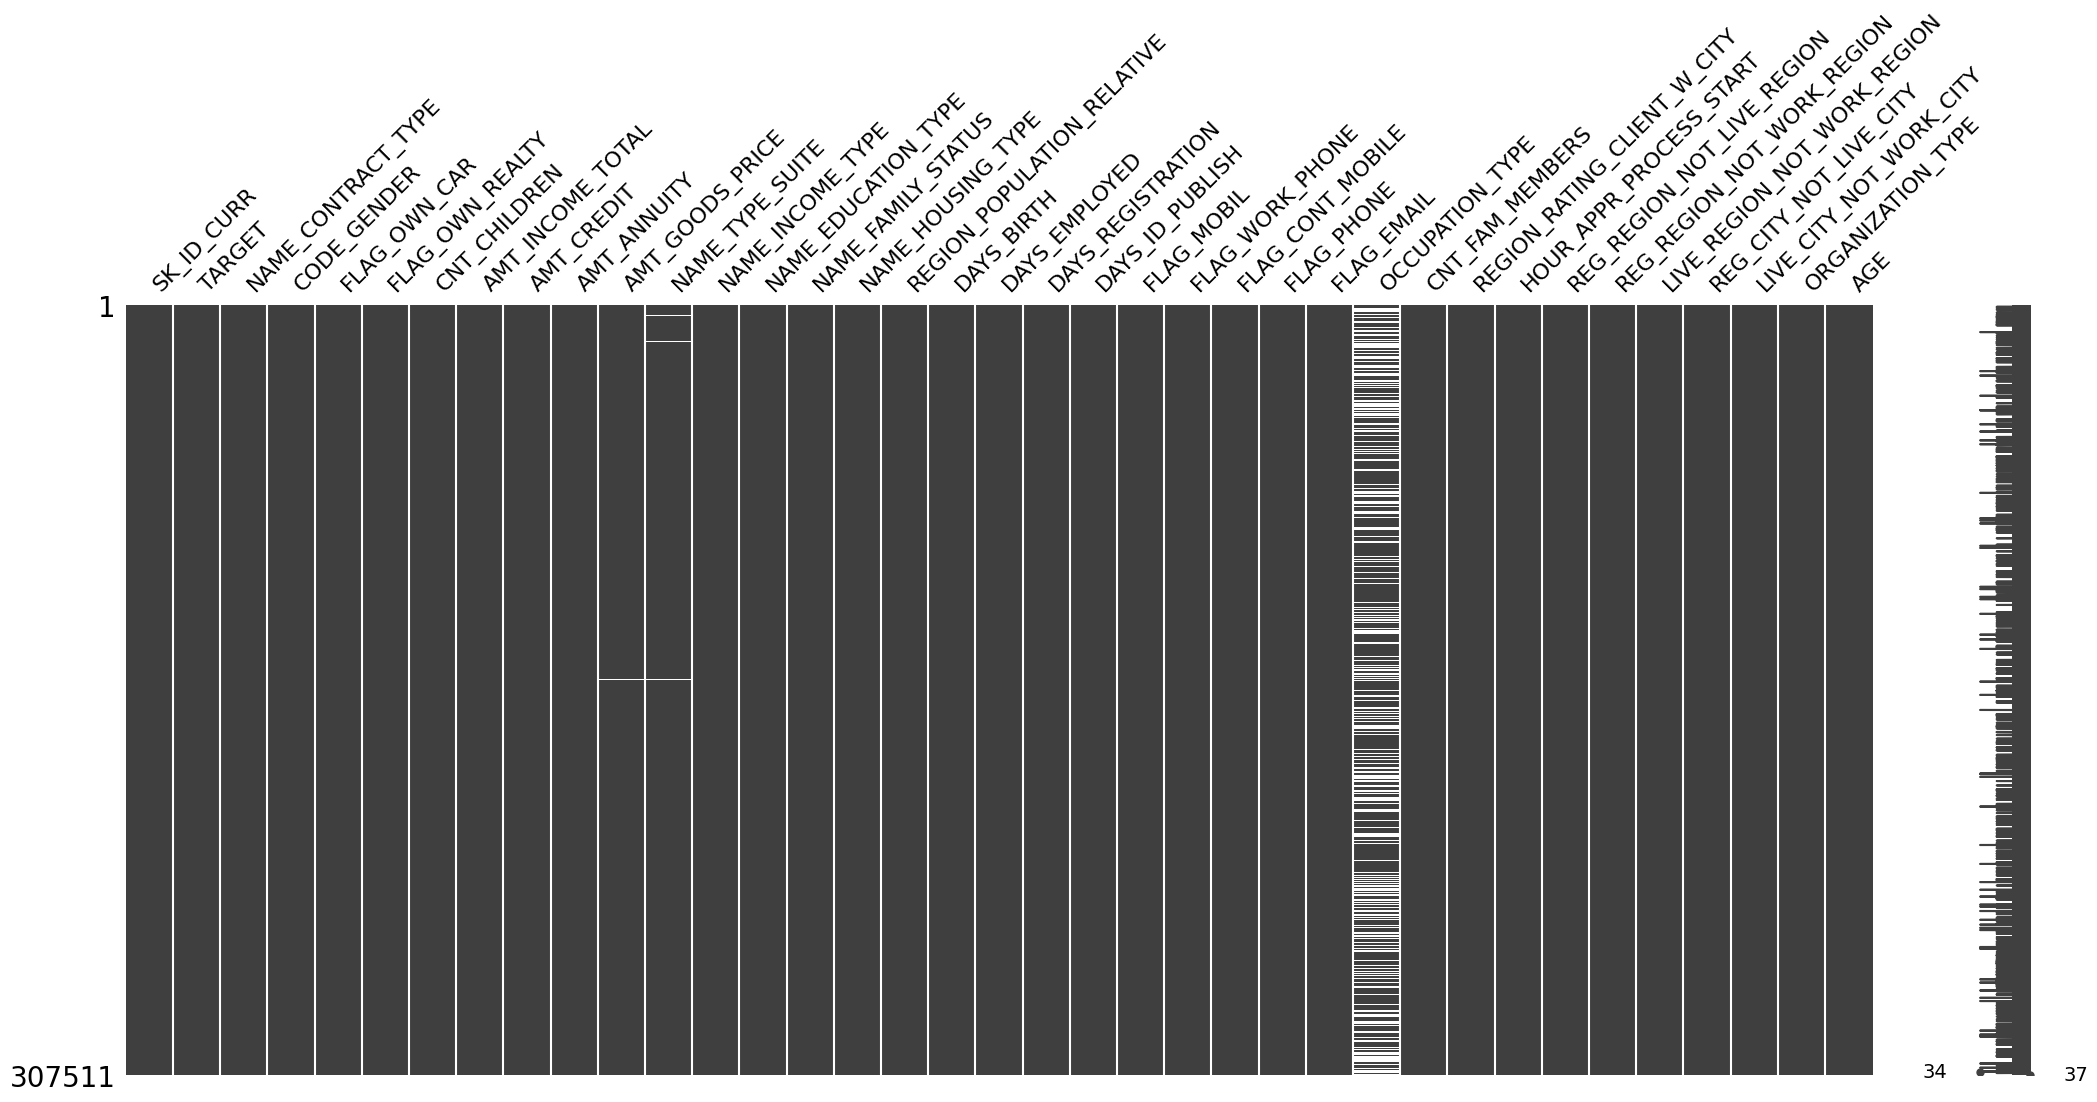

In [273]:
import missingno as msno
msno.matrix(df_new)

## 2.1 Drop Missing Values

In [271]:
df_new = df.drop(['WEEKDAY_APPR_PROCESS_START','OWN_CAR_AGE','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','REGION_RATING_CLIENT','REG_CITY_NOT_WORK_CITY','FLAG_EMP_PHONE','REG_CITY_NOT_WORK_CITY'], axis=1)
df_new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1.0,2,10,0,0,0,0,0,Business Entity Type 3,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,2.0,1,11,0,0,0,0,0,School,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1.0,2,9,0,0,0,0,0,Government,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,2,17,0,0,0,0,0,Business Entity Type 3,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,2,11,0,0,0,0,1,Religion,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,1.0,1,15,0,0,0,0,0,Services,25
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,1.0,2,8,0,0,0,0,0,XNA,56
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,3,9,0,0,0,0,1,School,41
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,2.0,2,9,0,0,0,1,0,Business Entity Type 1,32


In [279]:
len(df['ORGANIZATION_TYPE'].unique())

58

## 2.2 Fill Missing Value

In [274]:
# after filling missing value
cek_dict = cek.to_dict()
for i in cek_dict.keys():
    if cek_dict[i] > 0:
        df_new[i] = df_new[i].fillna(df_new[i].mode()[0])
        df_new[i].isnull().sum()
df_new.isnull().sum()


SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION

<AxesSubplot: >

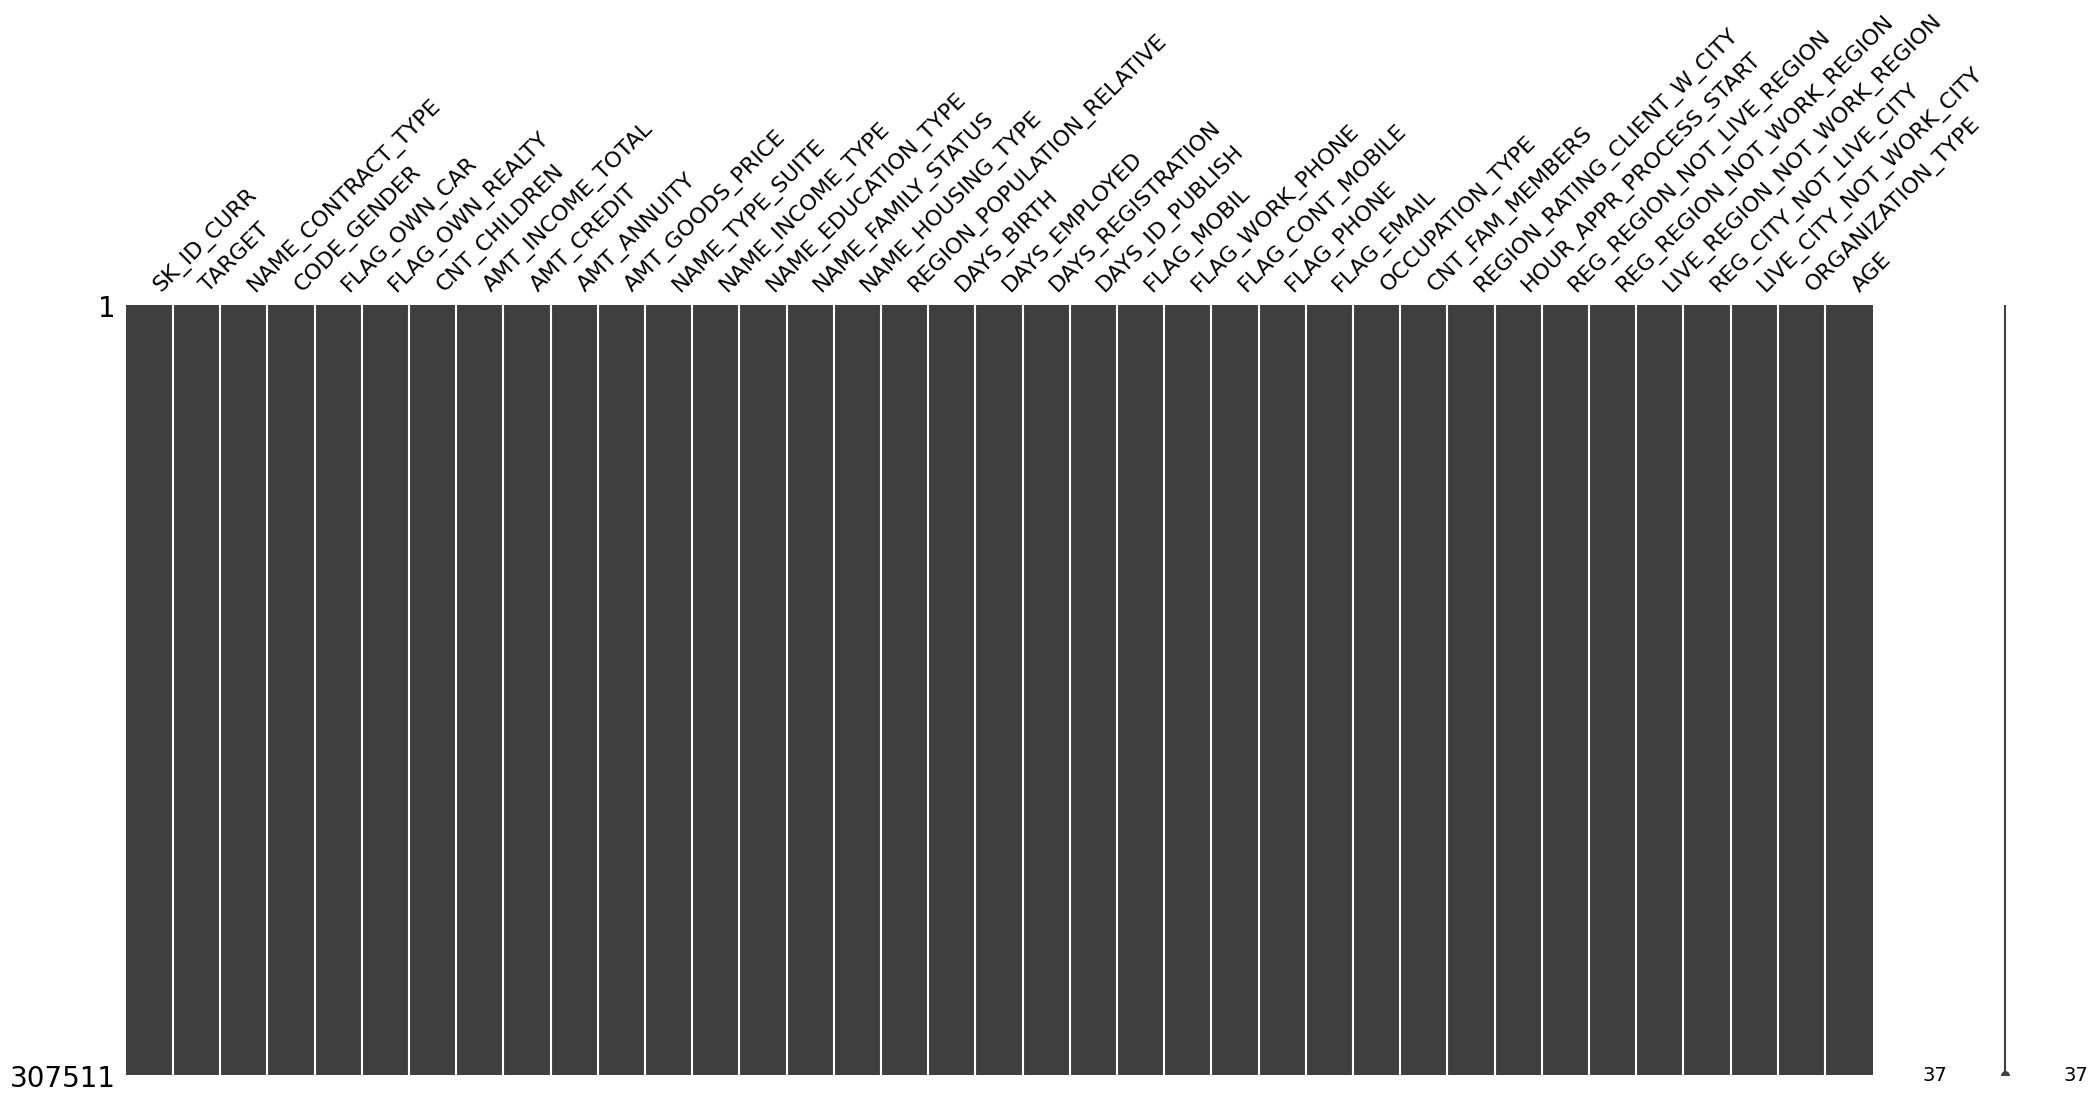

In [275]:
msno.matrix(df_new)

# 3 Recategorization High Cardinality in Categorical Features

In [244]:
def occu_category(x): 
    if x['OCCUPATION_TYPE'] in ['Laborers','Low-skill Laborers']: 
        occu = 'Laborers'
    elif x['OCCUPATION_TYPE'] in ['High skill tech staff', 'IT staff']:
        occu = 'Tech Staff'
    elif x['OCCUPATION_TYPE'] in ['Cleaning staff', 'Cooking staff','Waiters/barmen staff']:
        occu = 'Waiters Staff'
    elif x['OCCUPATION_TYPE'] in ['Sales staff', 'Realty agents']:
        occu = 'Sales & Realty Staff'
    elif x['OCCUPATION_TYPE'] in ['Accountants', 'Secretaries','HR staff']:
        occu = 'Office Staff'
    elif x['OCCUPATION_TYPE'] == 'Core staff':
        occu = 'Core Staff'
    elif x['OCCUPATION_TYPE'] == 'Managers':
        occu = 'Managers'
    elif x['OCCUPATION_TYPE'] == 'Drivers':
        occu = 'Drivers'
    elif x['OCCUPATION_TYPE'] == 'Private service staff':
        occu = 'Private Service Staff'
    elif x['OCCUPATION_TYPE'] == 'Medicine staff':
        occu = 'Medicine Staff'
    elif x['OCCUPATION_TYPE'] == 'Security staff':
        occu = 'Security Staff'
    return occu
# Membuat kolom baru yaitu kolom color_new menggunakan fungsi color_category
df_new['occupation_new'] = df_new.apply(lambda x: occu_category(x), axis=1)

In [245]:
def org_category(x): 
    org_type = x['ORGANIZATION_TYPE'].lower()
    org_type = org_type.split(' ')
    if 'type' not in org_type:
        return x['ORGANIZATION_TYPE'].lower()
    idx_search = org_type.index('type')
    result = "  ".join(org_type[:idx_search])
    result = result.replace(':','').strip()
    return result
df_new['organization_new'] = df_new.apply(lambda x: org_category(x), axis=1)

In [246]:
def type_suite_category(x): 
    if x['NAME_TYPE_SUITE'] in ['Family','Spouse, partner','Children']: 
        suite = 'Family'
    elif x['NAME_TYPE_SUITE'] in ['Other_A', 'Other_B','Group of people']:
        suite = 'Other'
    else:
        suite = 'Unaccompanied'
    return suite
df_new['NAME_TYPE_SUITE_new'] = df_new.apply(lambda x: type_suite_category(x), axis=1)

In [247]:
def type_income_category(x): 
    if x['NAME_INCOME_TYPE'] in ['Working','State servant','Commercial associate','Businessman','Maternity leave']: 
        income = 'Working'
    elif x['NAME_INCOME_TYPE'] == 'Pensioner':
        income = 'Pensioner'
    elif x['NAME_INCOME_TYPE'] == 'Student':
        income = 'Student'
    else:
        income = 'Unemployed'
    return income
df_new['NAME_INCOME_TYPE_new'] = df_new.apply(lambda x: type_income_category(x), axis=1)

In [248]:
def fam_stat_category(x): 
    if x['NAME_FAMILY_STATUS'] in ['Single / not married','Widow','Separated']: 
        fam_stat = 'Single'
    elif x['NAME_FAMILY_STATUS'] in ['Married','Civil marriage']:
        fam_stat = 'Married'
    else:
        fam_stat = 'Unknown'
    return fam_stat
df_new['NAME_FAMILY_STATUS_new'] = df_new.apply(lambda x: fam_stat_category(x), axis=1)

In [249]:
df_new['DAYS_EMPLOYED_new'] = df_new.apply(lambda x: (abs(x['DAYS_EMPLOYED'])//365) if x['DAYS_EMPLOYED'] <= 0 else -1, axis=1)

# 5. Feature Transformation

## 5.1 Transformasi dengan Pangkat 1/3

In [250]:
# CNT_CHILDREN
df_new['nchill_pow'] = df_new['CNT_CHILDREN'].apply(lambda x : x**(1/3))
print('Skew value CNT_CHILDREN:', df_new['nchill_pow'].skew())
# # DAYS_EMPLOYED
# df_new['demployed_pow'] = df_new['DAYS_EMPLOYED_new'].apply(lambda x : x**(1/3))
# print('Skew value DAYS_EMPLOYED_new:', df_new['demployed_pow'].skew())
# HOUR_APPR_PROCESS_START
df_new['hour_process_pow'] = df_new['HOUR_APPR_PROCESS_START'].apply(lambda x : x**(1/3))
print('Skew value HOUR_APPR_PROCESS_START:', df_new['hour_process_pow'].skew())

Skew value CNT_CHILDREN: 0.9596604778199966
Skew value HOUR_APPR_PROCESS_START: -0.8249771357396941


## 5.2 PowerTransformer <br>

In [251]:
from sklearn.preprocessing import PowerTransformer
# CNT_CHILDREN
df_new['nchill_pt'] = PowerTransformer().fit_transform(df_new['CNT_CHILDREN'].values.reshape(len(df_new), 1))
print('Skew value CNT_CHILDREN:', df_new['nchill_pt'].skew())
# # DAYS_EMPLOYED
# df_new['demployed_pt'] = PowerTransformer().fit_transform(df_new['DAYS_EMPLOYED_new'].values.reshape(len(df_new), 1))
# print('Skew value DAYS_EMPLOYED_new:', df_new['demployed_pt'].skew())
# HOUR_APPR_PROCESS_START
df_new['hour_process_pt'] = PowerTransformer().fit_transform(df_new['HOUR_APPR_PROCESS_START'].values.reshape(len(df_new), 1))
print('Skew value HOUR_APPR_PROCESS_START:', df_new['hour_process_pt'].skew())

Skew value CNT_CHILDREN: 0.8843917616006275
Skew value HOUR_APPR_PROCESS_START: -0.013834761342874405


In [252]:
# df_new = df_new.drop(['nchill_pow','demployed_pt','hour_process_pow'],axis=1)
df_new = df_new.drop(['nchill_pow','hour_process_pow'],axis=1)


In [253]:
rows_before_filt = len(df_new)

# 6. Handling Outliers

In [254]:
# Handling outlier dengan z-score
# cols = ['nchill_pt','demployed_pow','hour_process_pt']
cols = ['nchill_pt','hour_process_pt']

filtered_entries = np.array([True] * len(df_new))

for col in cols:
    zscore = abs(stats.zscore(df_new[col]))                       # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries        # keep yang kurang dari 3 absolute z-scorenya
    
df_new = df_new[filtered_entries]                                     # filter, cuma ambil yang z-scorenya dibawah 3

# Total baris yang dibuang
rows_after_filt = len(df_new)
diff = round((rows_before_filt - rows_after_filt) / rows_before_filt * 100, 2)
print(f'Jumlah baris setelah memfilter outlier: {len(df_new)}')
print(f'Persentase outlier yang dibuang:', diff)

Jumlah baris setelah memfilter outlier: 306889
Persentase outlier yang dibuang: 0.2


#8. Feature Selection <br>
- Kolom yang **di-drop**:
  - OCCUPATION_TYPE -> digantikan dengan kolom occupation_new
  - ORGANIZATION_TYPE -> digantikan dengan kolom organization_new
  - WEEKDAY_APPR_PROCESS_START -> karena tidak berpengaruh terhadap TARGET
  - DAYS_BIRTH -> digantikan dengan kolom AGE
  - SK_ID_CURR -> ID dihapus
  - DAYS_EMPLOYED -> digantikan dengan kolom DAYS_EMPLOYED_NEW

In [255]:
# df_train = df_new.drop(['SK_ID_CURR','CNT_CHILDREN','DAYS_EMPLOYED_new','HOUR_APPR_PROCESS_START','OCCUPATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED', 'ORGANIZATION_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'], axis=1)
df_train = df_new.drop(['SK_ID_CURR','CNT_CHILDREN','HOUR_APPR_PROCESS_START','OCCUPATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED', 'ORGANIZATION_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS'], axis=1)
df_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,LIVE_CITY_NOT_WORK_CITY,AGE,occupation_new,organization_new,NAME_TYPE_SUITE_new,NAME_INCOME_TYPE_new,NAME_FAMILY_STATUS_new,DAYS_EMPLOYED_new,nchill_pt,hour_process_pt
0,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Secondary / secondary special,...,0,25,Laborers,business entity,Unaccompanied,Working,Single,1,-0.653139,-0.633715
1,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Higher education,...,0,45,Core Staff,school,Family,Working,Married,3,-0.653139,-0.328045
2,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Secondary / secondary special,...,0,52,Laborers,government,Unaccompanied,Working,Single,0,-0.653139,-0.938857
3,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Secondary / secondary special,...,0,52,Laborers,business entity,Unaccompanied,Working,Married,8,-0.653139,1.515020
4,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Secondary / secondary special,...,1,54,Core Staff,religion,Unaccompanied,Working,Single,8,-0.653139,-0.328045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,157500.0,254700.0,27558.0,225000.0,Secondary / secondary special,...,0,25,Sales & Realty Staff,services,Unaccompanied,Working,Single,0,-0.653139,0.899135
307507,0,Cash loans,F,N,Y,72000.0,269550.0,12001.5,225000.0,Secondary / secondary special,...,0,56,Laborers,xna,Unaccompanied,Pensioner,Single,-1,-0.653139,-1.243421
307508,0,Cash loans,F,N,Y,153000.0,677664.0,29979.0,585000.0,Higher education,...,1,41,Managers,school,Unaccompanied,Working,Single,21,-0.653139,-0.938857
307509,1,Cash loans,F,N,Y,171000.0,370107.0,20205.0,319500.0,Secondary / secondary special,...,0,32,Laborers,business entity,Unaccompanied,Working,Married,13,-0.653139,-0.938857


# 9. Feature encoding

In [256]:
# Label encoding -> kolom transmission
mapping_yn = {
    'N' : 0,
    'Y' : 1
}
mapping_contract = {
    'Cash loans' : 0,
    'Revolving loans' : 1
}
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].map(mapping_yn)
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].map(mapping_yn)
df_train['NAME_CONTRACT_TYPE'] = df_train['NAME_CONTRACT_TYPE'].map(mapping_contract)


In [257]:
list(df_train.select_dtypes(include='object'))

['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'occupation_new',
 'organization_new',
 'NAME_TYPE_SUITE_new',
 'NAME_INCOME_TYPE_new',
 'NAME_FAMILY_STATUS_new']

In [258]:
# OHE -> kolom color_new, interior_new, make_new, body_new

cols_OHE = ['CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE','occupation_new','organization_new','NAME_TYPE_SUITE_new','NAME_INCOME_TYPE_new','NAME_FAMILY_STATUS_new']

for i in cols_OHE:
    onehots = pd.get_dummies(df_train[i], prefix=i)  # drop_first=True utk menghindari multicollinearity
    df_train = df_train.join(onehots)

In [259]:
df_train = df_train.drop(columns=cols_OHE)

In [260]:
df_train.head(2)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,...,NAME_TYPE_SUITE_new_Family,NAME_TYPE_SUITE_new_Other,NAME_TYPE_SUITE_new_Unaccompanied,NAME_INCOME_TYPE_new_Pensioner,NAME_INCOME_TYPE_new_Student,NAME_INCOME_TYPE_new_Unemployed,NAME_INCOME_TYPE_new_Working,NAME_FAMILY_STATUS_new_Married,NAME_FAMILY_STATUS_new_Single,NAME_FAMILY_STATUS_new_Unknown
0,1,0,0,1,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,...,1,0,0,0,0,0,1,1,0,0


In [261]:
df_train.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'AGE', 'DAYS_EMPLOYED_new', 'nchill_pt',
       'hour_process_pt', 'CODE_GENDER_F', 'CODE_GENDER_M', 'CODE_GENDER_XNA',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       

In [262]:
df_train

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,...,NAME_TYPE_SUITE_new_Family,NAME_TYPE_SUITE_new_Other,NAME_TYPE_SUITE_new_Unaccompanied,NAME_INCOME_TYPE_new_Pensioner,NAME_INCOME_TYPE_new_Student,NAME_INCOME_TYPE_new_Unemployed,NAME_INCOME_TYPE_new_Working,NAME_FAMILY_STATUS_new_Married,NAME_FAMILY_STATUS_new_Single,NAME_FAMILY_STATUS_new_Unknown
0,1,0,0,1,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,...,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,...,1,0,0,0,0,0,1,1,0,0
2,0,1,1,1,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,1,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,...,0,0,1,0,0,0,1,1,0,0
4,0,0,0,1,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,...,0,0,1,0,0,0,1,0,1,0
307507,0,0,0,1,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,...,0,0,1,1,0,0,0,0,1,0
307508,0,0,0,1,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,...,0,0,1,0,0,0,1,0,1,0
307509,1,0,0,1,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,...,0,0,1,0,0,0,1,1,0,0


In [263]:
df_train.to_csv('data_train_hci.csv')